In [1]:
from pygmsh.built_in.geometry import Geometry

In [2]:
geom = Geometry()

In [3]:
mesh_ele_size = .2
p1 = geom.add_point([0.0, 0.0, 0], lcar=mesh_ele_size)
p2 = geom.add_point([0.0, 1.0, 0], lcar=mesh_ele_size)
p3 = geom.add_point([1.0, 1.0, 0], lcar=mesh_ele_size)
p4 = geom.add_point([1.0, 0.0, 0], lcar=mesh_ele_size)
p5 = geom.add_point([0.2, 0.5, 0], lcar=mesh_ele_size)
p6 = geom.add_point([0.2, 0.7, 0], lcar=mesh_ele_size)
p7 = geom.add_point([1.0, 0.5, 0], lcar=mesh_ele_size)
p8 = geom.add_point([1.0, 0.7, 0], lcar=mesh_ele_size)

l1 = geom.add_line(p1, p4)
l2 = geom.add_line(p3, p2)
l3 = geom.add_line(p2, p1)
l4 = geom.add_line(p7, p5)
l5 = geom.add_line(p5, p6)
l6 = geom.add_line(p6, p8)
l7 = geom.add_line(p4, p7)
l8 = geom.add_line(p7, p8)
l9 = geom.add_line(p8, p3)

ll1 = geom.add_line_loop(lines=[l2, l3, l1, l7, l4, l5, l6, l9])
ps1 = geom.add_plane_surface(ll1)

ll2 = geom.add_line_loop(lines=[l6, -l8, l4, l5])
ps2 = geom.add_plane_surface(ll2)

# Tag line and surface
geom.add_physical(l3, label="LEFT")
geom.add_physical(l2, label="TOP")
geom.add_physical([l9, l8, l7], label="RIGHT")
geom.add_physical(l1, label="BOTTOM")


geom.add_physical(ps1, label="DOMAIN")
geom.add_physical(ps2, label="OBSTACLE")

#print("\n".join(geom._GMSH_CODE))

In [4]:
from pygmsh import generate_mesh
mesh = generate_mesh(geom)

Info    : Running 'gmsh -3 /tmp/tmpm4ni8mmd.geo -format msh -bin -o /tmp/tmpzyo97afk.msh' [Gmsh 4.2.2, 1 node, max. 1 thread]
Info    : Started on Thu Jul  4 09:58:37 2019
Info    : Reading '/tmp/tmpm4ni8mmd.geo'...
Info    : Done reading '/tmp/tmpm4ni8mmd.geo'
Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Meshing curve 2 (Line)
Info    : Meshing curve 3 (Line)
Info    : Meshing curve 4 (Line)
Info    : Meshing curve 5 (Line)
Info    : Meshing curve 6 (Line)
Info    : Meshing curve 7 (Line)
Info    : Meshing curve 8 (Line)
Info    : Meshing curve 9 (Line)
Info    : Done meshing 1D (0 s)
Info    : Meshing 2D...
Info    : Meshing surface 11 (Plane, Delaunay)
Info    : Meshing surface 13 (Plane, Delaunay)
Info    : Done meshing 2D (0 s)
Info    : Meshing 3D...
Info    : Done meshing 3D (0 s)
Info    : 51 vertices 117 elements
Info    : Writing '/tmp/tmpzyo97afk.msh'...
Info    : Done writing '/tmp/tmpzyo97afk.msh'
Info    : Stopped on Thu Jul  4 09:58:37 2019


# Step 2: Mesh conversion with meshio to XDMF

In [5]:
import meshio

In [6]:
points, cells, cell_data = mesh.points, mesh.cells, mesh.cell_data

In [13]:
meshio.write("output/poisson_mesh.xdmf", meshio.Mesh(
    points=points[:,:2],# Converting to 2D
    cells={"triangle": cells["triangle"]}))

In [36]:
meshio.write("output/poisson_mvc.xdmf", meshio.Mesh(
    points=points[:,:2],# Converting to 2D
    cells={"line": cells["line"]},
    cell_data={"line": {"boundaries": cell_data["line"]["gmsh:physical"]}}
))

# Step 3: Reading mesh in dolfinx

In [37]:
import dolfin
import dolfin.io
import numpy

In [38]:
with dolfin.io.XDMFFile(dolfin.MPI.comm_world,"output/poisson_mesh.xdmf") as xdmf_infile:
    mesh_2d = xdmf_infile.read_mesh(dolfin.MPI.comm_world, dolfin.cpp.mesh.GhostMode.none)

In [39]:
import dolfin.plotting as plt
%matplotlib inline

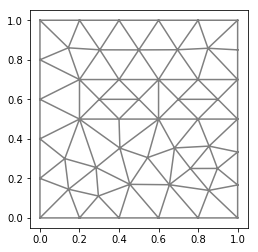

In [40]:
plt.plot(mesh_2d)

In [41]:
cells['line']

array([[ 0,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11,  3],
       [ 2, 12],
       [12, 13],
       [13, 14],
       [14, 15],
       [15,  1],
       [ 1, 16],
       [16, 17],
       [17, 18],
       [18, 19],
       [19,  0],
       [ 3, 26],
       [26, 27],
       [27,  6],
       [ 6,  7],
       [ 7, 28],
       [28,  2]])

In [42]:
points

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.2       ,  0.5       ,  0.        ],
       [ 0.2       ,  0.7       ,  0.        ],
       [ 1.        ,  0.5       ,  0.        ],
       [ 1.        ,  0.7       ,  0.        ],
       [ 0.2       ,  0.        ,  0.        ],
       [ 0.4       ,  0.        ,  0.        ],
       [ 0.6       ,  0.        ,  0.        ],
       [ 0.8       ,  0.        ,  0.        ],
       [ 0.8       ,  1.        ,  0.        ],
       [ 0.6       ,  1.        ,  0.        ],
       [ 0.4       ,  1.        ,  0.        ],
       [ 0.2       ,  1.        ,  0.        ],
       [ 0.        ,  0.8       ,  0.        ],
       [ 0.        ,  0.6       ,  0.        ],
       [ 0.        ,  0.4       ,  0.        ],
       [ 0.        ,  0.2       ,  0.        ],
       [ 0.8       ,  0.5       ,  0.   

In [51]:
with dolfin.io.XDMFFile(dolfin.MPI.comm_world, "output/poisson_mvc.xdmf") as xdmf_infile:
    mvc_boundaries = xdmf_infile.read_mvc_size_t(mesh_2d, "boundaries")
boundaries = dolfin.cpp.mesh.MeshFunctionSizet(mesh_2d, mvc_boundaries, 0)

In [54]:
boundaries.array()

array([3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0], dtype=uint64)

In [59]:
boundaries.where_equal(1)

[54, 55, 57, 58, 101]

In [44]:
map_gmsh_dolfin={}

In [45]:
for pt in numpy.unique(cells['line']):
    for ve in dolfin.Vertices(mesh_2d):
        if (ve.point() == points[pt]).all():
            map_gmsh_dolfin[pt] = ve.entities(0)[0]
            print(pt," : ",ve.entities(0),":",ve.point())

0  :  [33] : [ 0.  0.  0.]
1  :  [36] : [ 0.  1.  0.]
2  :  [8] : [ 1.  1.  0.]
3  :  [27] : [ 1.  0.  0.]
6  :  [25] : [ 1.   0.5  0. ]
7  :  [0] : [ 1.   0.7  0. ]
8  :  [35] : [ 0.2  0.   0. ]
9  :  [23] : [ 0.4  0.   0. ]
10  :  [20] : [ 0.6  0.   0. ]
11  :  [18] : [ 0.8  0.   0. ]
12  :  [16] : [ 0.8  1.   0. ]
13  :  [41] : [ 0.6  1.   0. ]
14  :  [43] : [ 0.4  1.   0. ]
15  :  [37] : [ 0.2  1.   0. ]
16  :  [14] : [ 0.   0.8  0. ]
17  :  [13] : [ 0.   0.6  0. ]
18  :  [15] : [ 0.   0.4  0. ]
19  :  [32] : [ 0.   0.2  0. ]
26  :  [28] : [ 1.          0.16666667  0.        ]
27  :  [24] : [ 1.          0.33333333  0.        ]
28  :  [1] : [ 1.    0.85  0.  ]


In [46]:
map_gmsh_dolfin

{0: 33,
 1: 36,
 2: 8,
 3: 27,
 6: 25,
 7: 0,
 8: 35,
 9: 23,
 10: 20,
 11: 18,
 12: 16,
 13: 41,
 14: 43,
 15: 37,
 16: 14,
 17: 13,
 18: 15,
 19: 32,
 26: 28,
 27: 24,
 28: 1}

In [47]:
from dolfin import *

In [48]:
edges=dolfin.MeshEntities(mesh_2d,1)

In [49]:
for edge in edges:
    st = ""
    for vtx in VertexRange(edge):
        st = st +" "+ str(vtx.global_index())
    print(edge.global_index(), st)

0  7 28
1  7 37
2  25 7
3  7 6
4  7 50
5  28 37
6  28 2
7  25 37
8  2 37
9  12 37
10  31 37
11  4 34
12  4 44
13  4 36
14  22 4
15  4 5
16  4 17
17  18 4
18  4 48
19  34 44
20  34 36
21  34 33
22  34 41
23  34 46
24  22 44
25  35 44
26  21 44
27  33 44
28  18 36
29  36 19
30  36 41
31  24 25
32  31 25
33  49 25
34  25 50
35  2 12
36  21 22
37  47 22
38  22 48
39  35 21
40  35 32
41  33 35
42  35 43
43  21 43
44  20 21
45  21 24
46  21 49
47  21 47
48  17 5
49  16 5
50  5 42
51  5 23
52  5 30
53  5 48
54  17 16
55  18 17
56  16 42
57  1 16
58  18 19
59  12 31
60  12 13
61  32 11
62  32 40
63  10 32
64  32 33
65  32 43
66  29 32
67  11 40
68  10 11
69  11 3
70  3 40
71  40 26
72  29 40
73  40 45
74  10 33
75  9 10
76  9 33
77  33 46
78  39 43
79  20 43
80  29 43
81  8 9
82  9 46
83  27 6
84  27 39
85  26 27
86  27 45
87  6 39
88  6 20
89  6 50
90  39 20
91  29 39
92  39 45
93  3 26
94  26 45
95  20 49
96  20 50
97  29 45
98  1 42
99  15 42
100  30 42
101  19 0
102  19 41
103  0 41
104  0

In [50]:
edge_table=[]
for edge in edges:
    print(edge.global_index(),"  ",edge.entities(0)[0],"",edge.entities(0)[1]) 

0    0  1
1    0  2
2    7  0
3    0  25
4    0  50
5    1  2
6    1  8
7    7  2
8    8  2
9    16  2
10    40  2
11    3  4
12    3  5
13    3  6
14    9  3
15    3  12
16    3  13
17    15  3
18    3  49
19    4  5
20    4  6
21    4  21
22    4  34
23    4  45
24    9  5
25    10  5
26    11  5
27    21  5
28    15  6
29    6  32
30    6  34
31    39  7
32    40  7
33    47  7
34    7  50
35    8  16
36    11  9
37    48  9
38    9  49
39    10  11
40    10  17
41    21  10
42    10  22
43    11  22
44    29  11
45    11  39
46    11  47
47    11  48
48    13  12
49    14  12
50    12  31
51    12  42
52    12  44
53    12  49
54    13  14
55    15  13
56    14  31
57    36  14
58    15  32
59    16  40
60    16  41
61    17  18
62    17  19
63    20  17
64    17  21
65    17  22
66    30  17
67    18  19
68    20  18
69    18  27
70    27  19
71    19  28
72    30  19
73    19  46
74    20  21
75    23  20
76    23  21
77    21  45
78    26  22
79    29  22
80    30  22
81    35  

In [28]:
mesh_2d.create_connectivity(1,0)# connectivity in a 2d geo of lines

In [29]:
connectivity=mesh_2d.topology.connectivity(1,0)

In [30]:
connectivity.connections(4)

array([ 0, 50], dtype=int32)

In [31]:
vertex=Vertex(mesh_2d,15)
vertex.point()

array([ 0. ,  0.4,  0. ])

In [32]:
vertex.index()

15

In [33]:
edge=Edge(mesh_2d, 22)
edge.entities(0)

array([ 4, 34], dtype=int32)

In [34]:
edge.global_index()

22

In [35]:
mesh_2d.topology.global_indices(0)

array([ 7, 28, 37,  4, 34, 44, 36, 25,  2, 22, 35, 21,  5, 17, 16, 18, 12,
       32, 11, 40, 10, 33, 43,  9, 27,  6, 39,  3, 26, 20, 29, 42, 19,  0,
       41,  8,  1, 15, 38, 24, 31, 13, 23, 14, 30, 46, 45, 49, 47, 48, 50], dtype=int64)